# Seaborn - Grids

Grid-urile din Seaborn reprezintă în mare parte ceea ce este subplots() din Matplotlib. Aceste creează automat un grid pentru fiecare categorie dintr-o coloană de tip categorical. În partea de Matplotlib trebuia să specificăm numărul de coloane și de rânduri pentru a ști câte grid-uri să ne facă, aici este destul să specificăm numele coloanei pentru care dorim să facem grid-uri, iar Seaborn se va ocupa automat de asta. De exemplu putem să luăm un boxplot() și să creem o serie de mai multe girduri, fiecare grid să reprezinte câte o categorie dintr-o anumită coloană.

Aceste concepte sunt explicate cel mai bine prin cod

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file into a DataFrame
df = pd.read_csv('../data/05-Seaborn/StudentsPerformance.csv')

In [4]:
# printing the head of the DataFrame
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Există două ploturi pe care le putem folosim pentru a crea griduri, iar primul dintre ele poartă denumirea de 'catplot()' (categorical plot). Acestei metode trebuie să oferim valori pentru parametrii 'data', 'x', 'y' și 'kind'. Primi trei parametrii știm la ce se referă, ultimul este reprezentat de tipul de plot care să se creeze

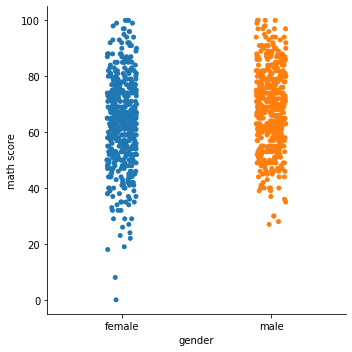

In [5]:
sns.catplot(x='gender', y='math score', data=df)

În modul default, kind este trecut ca și 'strip'. Dacă dorim să creem altfel de plot putem să specificăm asta. De exemplul, dacă se dorește să avem un plot de tip boxplot, la parametrul de kind putem să îi atribuim ca și valoare 'box'

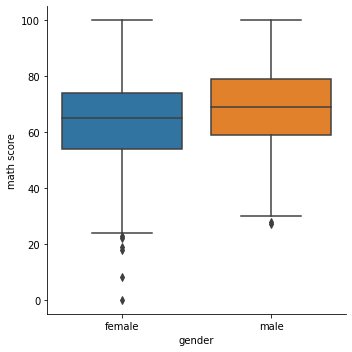

In [7]:
sns.catplot(x='gender', y='math score', data=df, kind='box')

În acest moment ce este afișat este un boxplot() simplu, însă l-am creat utilizând metoda generală pentru a crea ploturi categorice, și anume 'catplot()'. Ce este diferit la acest tip de plot (adică la metoda catplot()) este faptul că are un set de parametrii adiționali, 'row' și 'column'. Să luăm parametrul row. Acestuia o să îi atribuim ca și valoare o coloană de tip categorical, iar ce o să facă seaborn, o să creeze câte un rând separat pentru fiecare categorie din acea coloană și o să creeze aceste boxplot() pentru fiecare categorie în parte.

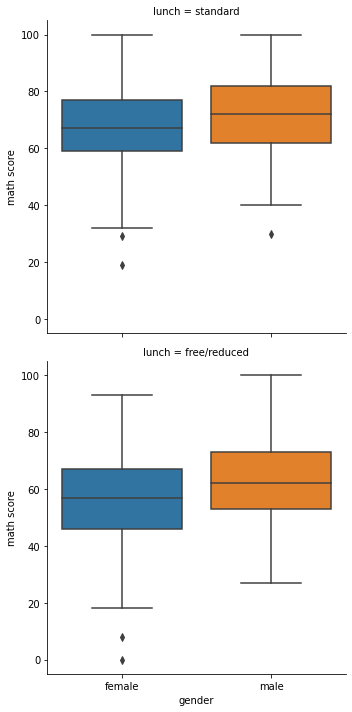

In [9]:
sns.catplot(x='gender', y='math score', data=df, kind='box', row='lunch')

În acest moment avem două ploturi separate de tip boxplot pentru categoriile prezente în coloana 'lunch'. Aceste subploturi pot fi trecute fie pe rânduri, fie pe coloane. De asemenea, acuma cum pe rânduri avem coloana categorică denumită 'lunch', pe coloane putem să oferim altă coloană categorică pentru a reprezenta datele respective în funcție de mai multe coloane.

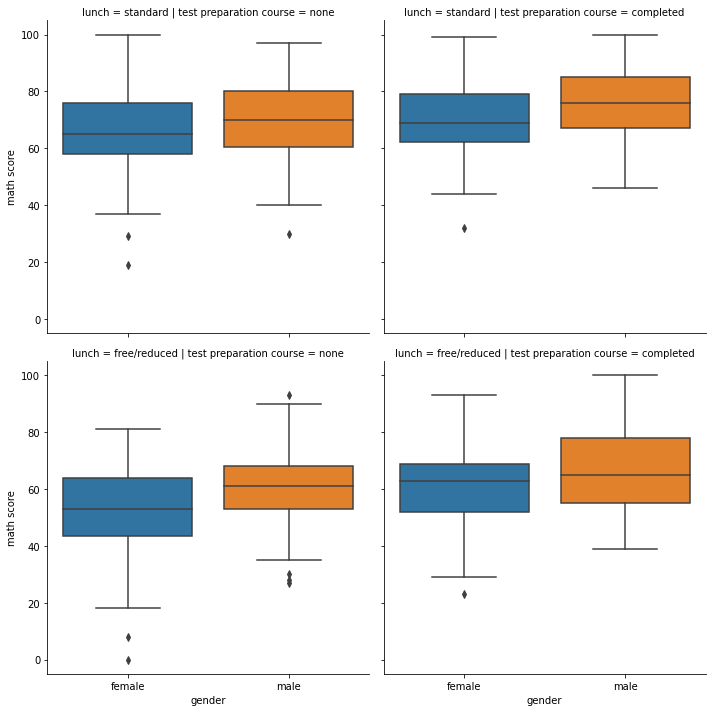

In [10]:
sns.catplot(x='gender', y='math score', data=df, kind='box', row='lunch', col='test preparation course')

Ce este creat mai sus este echivalentul a subploturilor din Matplotlib, însă crearea acestora este mult mai ușoară.

Cel de al doilea tip de grid este 'PariGrid()'. Ce face metoda respectivă, aceast doar se ocupă cu partea de creare de grid-uri pentru un DataFrame

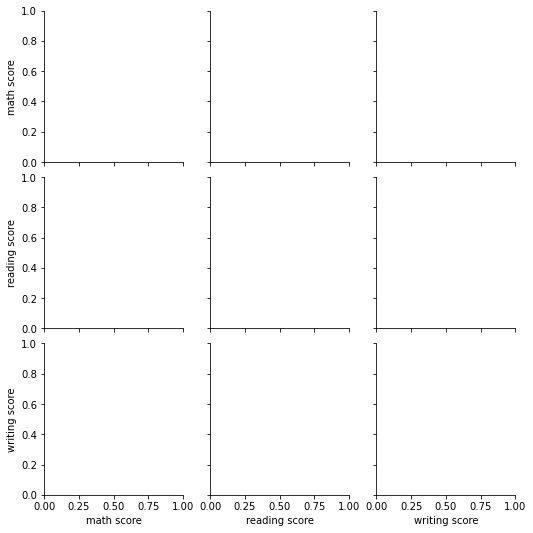

In [11]:
sns.PairGrid(data=df)

Când se aplează metoda respectivă aceasta creează grid-uri pentru a compara coloanele numerice de tip continuous dintr-un DataFrame. Metoda respectivă este apelată în momentul în care se aplează metoda 'pairplot()'. Știm că pairplot() creează această comparație între coloanele respective, iar aceasta apelează 'PariGrid()' care creează gird-urile, iar acestea după sunt completate. Ce putem să facem cu metoda de mai sus? Putem să salvăm rezultatul metodei respective într-o variabilă, iar pentru acea variabilă să apelăm ploturi diferite, asta dacă se dorește să se creeze ploturi diferite. Pentru a apela ploturi diferite, gridurile trebuie mapate la aceste ploturi, iar maparea se va face în trei moduri:

- map_upper()

- map_diag()

- map_lower()

După cum le spune și numele, map_upper() se ocupă cu maparea girdurilor ce sunt localizate în sus față de diagonală, map_diag() se ocupă de diagonală, iar map_lower() de partea din jos.

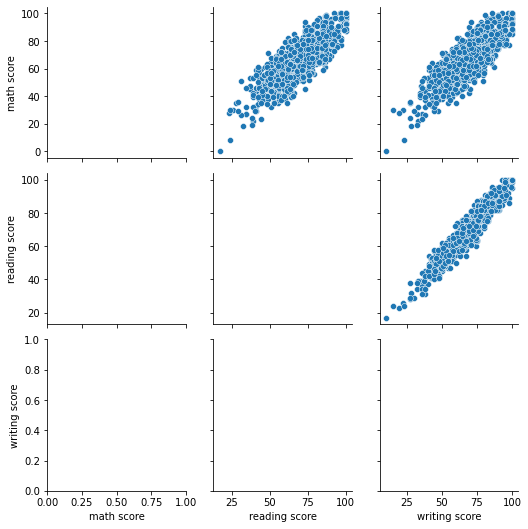

In [12]:
grids = sns.PairGrid(data=df)

grids.map_upper(sns.scatterplot)

Cum se poate observa, dacă am mapat doar griduri pentru partea de sus, doar acestea au fost afișate. În cadrul metodei respective se va trece ce tip de grid dorim să se genereze, iar acest tip trebuie apelat utilizând librăria Seaborn (sns.scatterplot). De notat însă faptul că ploturile respective doar se specifică, nu se apelează (se trec fără setul de paranteze rotunde)

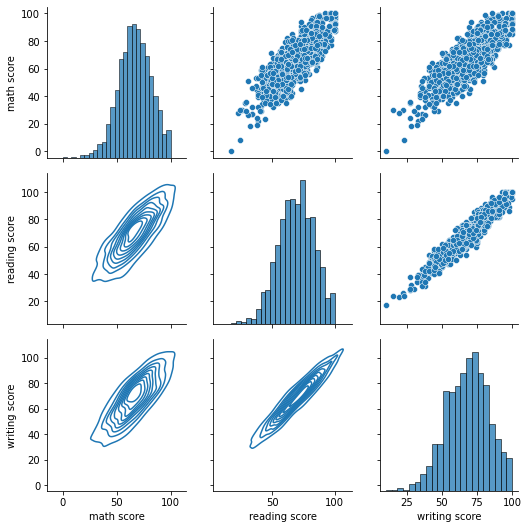

In [15]:
grids = sns.PairGrid(data=df)

grids.map_upper(sns.scatterplot)
grids.map_diag(sns.histplot)
grids.map_lower(sns.kdeplot)

Metoda de mai sus reprezintă o modalitate de a customatiza un pairplot() în situațiile în care se dorește. Acest procedeu însă nu este extrem de des întâlnit, însă acesta există

## Recapitulare

În cadrul acestui tutorial am învățat următoarele lucruri:

    1. Cum să creem ploturi categorice utilizând metoda generală catplot()

        sns.catplot(x='gender', y='math score', data=df, kind='box')

    2. Cum să creem griduri separate în funcție de o coloană categorică utilizând metoda generală catplot()

        sns.catplot(x='gender', y='math score', data=df, kind='box', row='lunch') # creează două rânduri

        sns.catplot(x='gender', y='math score', data=df, kind='box', col='lunch') # creează două coloane

    3. Cum putem customatiza un pairplot() utilizând meotoda 'PairGrid()'

        grids = sns.PairGrids(data=df) # creează numărul de griduri necesare pentru întreg DataFrame-ul

        grids.map_upper() # mapează gridurile din sus de diagonală

        grids.map_diag() # mapează gridurile pe diagonală

        grids.map_lower() # mapează gridurile din jos de diagonală